## Problem Set 6

### Problem 0

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Problem 1

We will investigate the importance of preprocessing your dataset in this exercise. You will work with the unprocessed diabetes dataset in problem 1a, and you will preprocess it in 1b. You'll train a regression model in both problems and you'll compare the feature coefficients. This exercise is a preparation for one of the last topics we will cover in class: interpretability.

The coefficients of a linear model (the $w$'s) can be used to measure the importance of features if and only if all features have the same mean and standard deviation (even the one-hot encoded features!). Here is why:

The feature coefficients are determined by two things:
- the importance of the feautre
    - more important features have larger $w$'s
- the order of magnitude of the feature relative to the target variable
    - if a feature tends to be orders of magnitudes larger than the target variable, the feature's weight will be small in order to bring the feature to the same order of magnitude as the target variable 
    - similarly, if a feature tends to be orders of magnitudes smaller than the target variable, the feature's weight will be large in order to bring the feature to the same order of magnitude as the target variable 

This is an ambiguity since a feature could have a large $w$ because either it is important and/or because the feature values tend to be much smaller than the target variable.

The only way to remove this ambiguity is to standardize all features. If all features have the same mean and the same standard deviation (most commonly 0 mean and 1 standard deviation when you use the StandardScaler), all features have the same order of magnitudes. Then the feature coefficient is purely determined by the importance of the feature and it can be used to rank features based on how important they are.


### Problem 1a (10 points)

First, read in the dataset into a pandas dataframe using the tab delimited file linked at [this page](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Loop through 10 different random states. Split the dataset into training and test sets (70-30 ratios). We won't tune the regularization parameter, so we don't need a validation set for this exercise. Do not preprocess the sets. Train a linear regression model with Ridge regularization with alpha = 1. Use RMSE as your evaluation metric and print out the mean and standard deviation of the training and test scores. For each random state, save the test score and the model's coefficients for each feature.

Once you loop through the 10 random states, prepare one plot which shows the mean and standard deviation of each feature's coefficient. Make sure to have proper x and y ticks and labels, as well as a title.

Hint: use plt.errorbar() or something similar for the figure.

In [69]:
# your code here

import numpy as np
import pandas as pd

data = np.loadtxt("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt",dtype = 'object', delimiter = '\t')
df = pd.DataFrame(data, columns = data[0])
df.drop([0], inplace=True)
df = pd.DataFrame(df,dtype=float)
print(df)


      AGE  SEX   BMI      BP     S1     S2    S3    S4      S5     S6      Y
1    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0  151.0
2    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0   75.0
3    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0  141.0
4    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0  206.0
5    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0  135.0
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...    ...
438  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0  178.0
439  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0  104.0
440  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0  132.0
441  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0  220.0
442  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0   57.0

[442 rows x 11 columns]


In [70]:
y = df['Y']
X = df.loc[:,df.columns!='Y']
print(y)
print(X)

1      151.0
2       75.0
3      141.0
4      206.0
5      135.0
       ...  
438    178.0
439    104.0
440    132.0
441    220.0
442     57.0
Name: Y, Length: 442, dtype: float64
      AGE  SEX   BMI      BP     S1     S2    S3    S4      S5     S6
1    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
2    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
3    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
4    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
5    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
438  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
439  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
440  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
441  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
442  36.0  1.0  19.6   71.00  250.0  133.2  97.0  

In [71]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ws = []
models = []
train_RMSE_Ridge = np.zeros(10)
test_RMSE_Ridge = np.zeros(10)

for i in np.arange(0,10):
    random_state = i
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = random_state)


    lin_reg_Ridge = Ridge(alpha = 1)
    lin_reg_Ridge.fit(X_train,y_train)
    ws.append(lin_reg_Ridge.coef_)
    # ws = lin_reg_Ridge.coef_
    train_RMSE_Ridge[i] = np.sqrt(mean_squared_error(y_train,lin_reg_Ridge.predict(X_train)))
    test_RMSE_Ridge[i] = np.sqrt(mean_squared_error(y_test,lin_reg_Ridge.predict(X_test)))
    
# print(ws)
# print('train_RMSE_Ridge:',train_RMSE_Ridge)
# print('test_RMSE_Ridge:',test_RMSE_Ridge)

mean_RMSE_train = np.mean(train_RMSE_Ridge)
sd_RMSE_train = np.std(train_RMSE_Ridge)
mean_RMSE_test = np.mean(test_RMSE_Ridge)
sd_RMSE_test = np.std(test_RMSE_Ridge)

print('mean_RMSE_train:',mean_RMSE_train)
print('sd_RMSE_train:',sd_RMSE_train)
print('mean_RMSE_test:',mean_RMSE_test)
print('sd_RMSE_test:',sd_RMSE_test)

mean_RMSE_train: 53.56305204089379
sd_RMSE_train: 0.9616872677849102
mean_RMSE_test: 53.8924862901712
sd_RMSE_test: 2.4429514050299703


In [72]:
ws = pd.DataFrame(ws,columns=df.columns[0:10])
print(ws)
ws_mean = ws.apply(np.mean,axis=0)
ws_std = ws.apply(np.std,axis=0)
print('Mean of ws:',ws_mean)
print('Standard deviation of ws:',ws_std)

        AGE        SEX       BMI        BP        S1        S2        S3  \
0 -0.185247 -18.193752  6.294161  0.939321 -0.476202  0.179801 -0.501642   
1 -0.043508 -22.318352  6.332460  1.188911 -0.673234  0.336051  0.087807   
2 -0.114264 -20.130720  4.859178  1.298256 -0.854470  0.593417  0.116496   
3 -0.001036 -27.031980  5.860316  1.132431 -0.549570  0.156803 -0.180407   
4  0.023796 -27.231702  4.691735  1.455805 -0.937586  0.560439  0.289883   
5 -0.184288 -20.250942  5.634122  1.139047 -0.590967  0.428200 -0.208808   
6 -0.238401 -28.561111  5.787773  1.256737 -1.376154  0.977037  0.623009   
7 -0.173473 -23.463504  5.458498  1.246661 -1.020736  0.807079 -0.044394   
8  0.053576 -26.361618  5.741712  1.407782 -1.277559  0.850827  0.574970   
9 -0.130695 -23.206999  4.643420  1.296368 -1.291514  1.036165  0.453359   

         S4         S5        S6  
0  2.731265  59.236027  0.120491  
1  7.608542  54.020459  0.203513  
2  5.982021  65.410342  0.243763  
3  8.252598  49.044142 

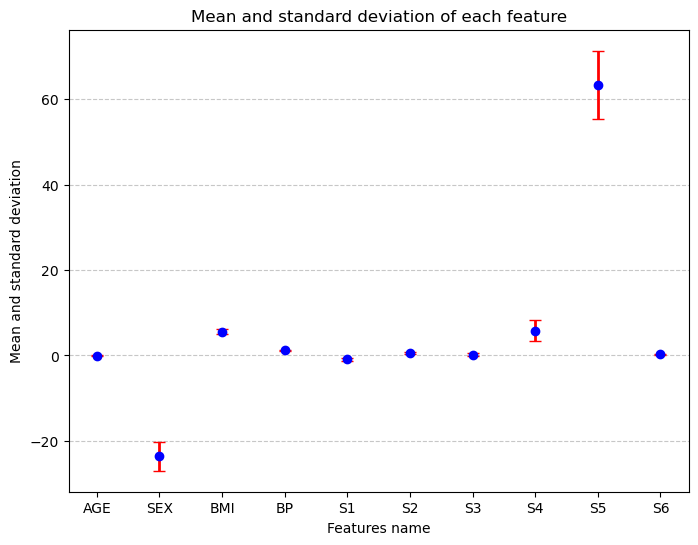

In [73]:
from matplotlib import pylab as plt
plt.figure(figsize=(8,6))
plt.errorbar(ws_mean.index,ws_mean,yerr=ws_std,fmt='o',ecolor='r',color='b',elinewidth=2,capsize=4)
plt.xlabel('Features name')
plt.ylabel('Mean and standard deviation')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.title('Mean and standard deviation of each feature')
plt.show()

### Problem 1b (10 points)

Now let's repeat what you did in 1a but this time preprocess the sets with the standard scaler.

Notice how the coefficients change as a result of preprocessing. 

Answer the following questions:

Q1: Do you see a statistically significant change in the test score?

Q2: How would you order the features based on the coefficients for feature importance? Explain your answer in a few sentences.

Q3: Print out names of the top 3 most important features!

In [74]:
# your code here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ws = []
models = []
train_RMSE_Ridge = np.zeros(10)
test_RMSE_Ridge = np.zeros(10)

for i in np.arange(0,10):
    random_state = i
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = random_state)
    
    scaler = StandardScaler()
    X_train_prep = scaler.fit_transform(X_train)
    X_test_prep = scaler.transform(X_test)

    lin_reg_Ridge = Ridge(alpha = 1)
    lin_reg_Ridge.fit(X_train_prep,y_train)
    ws.append(lin_reg_Ridge.coef_)
    train_RMSE_Ridge[i] = np.sqrt(mean_squared_error(y_train,lin_reg_Ridge.predict(X_train_prep)))
    test_RMSE_Ridge[i] = np.sqrt(mean_squared_error(y_test,lin_reg_Ridge.predict(X_test_prep)))
    
# print(ws)
# print('train_RMSE_Ridge:',train_RMSE_Ridge)
# print('test_RMSE_Ridge:',test_RMSE_Ridge)

mean_RMSE_train = np.mean(train_RMSE_Ridge)
sd_RMSE_train = np.std(train_RMSE_Ridge)
mean_RMSE_test = np.mean(test_RMSE_Ridge)
sd_RMSE_test = np.std(test_RMSE_Ridge)

print('mean_RMSE_train:',mean_RMSE_train)
print('sd_RMSE_train:',sd_RMSE_train)
print('mean_RMSE_test:',mean_RMSE_test)
print('sd_RMSE_test:',sd_RMSE_test)

mean_RMSE_train: 53.567849165403345
sd_RMSE_train: 0.9649854790896251
mean_RMSE_test: 53.869845807423665
sd_RMSE_test: 2.44193559219411


In [75]:
ws = pd.DataFrame(ws,columns=df.columns[0:10])
print(ws)
ws_mean = ws.apply(np.mean,axis=0)
ws_std = ws.apply(np.std,axis=0)
print('Mean of ws:',ws_mean)
print('Standard deviation of ws:',ws_std)

        AGE        SEX        BMI         BP         S1         S2        S3  \
0 -2.482135  -9.156631  27.977149  12.915933 -17.888203   6.745040 -6.046448   
1 -0.594851 -11.220934  28.163708  15.796934 -22.993568   9.788597  0.497228   
2 -1.530331 -10.045221  20.394075  17.640878 -27.636848  16.619083  0.634153   
3 -0.002090 -13.607168  26.019002  15.583900 -18.673859   4.957155 -2.394489   
4  0.321477 -13.656771  21.198201  20.298022 -29.951824  15.496475  2.564805   
5 -2.438016 -10.123236  24.658054  15.931830 -19.631481  12.868707 -2.628530   
6 -3.096870 -14.335344  24.934905  16.646370 -42.713539  26.628460  5.519056   
7 -2.252525 -11.745524  23.894639  17.303822 -32.624219  23.148914 -2.050551   
8  0.721527 -13.177431  24.770373  19.149964 -40.108487  22.631183  4.819002   
9 -1.710177 -11.568906  20.196937  17.520475 -39.916653  28.563960  3.804739   

          S4         S5        S6  
0   3.468214  33.024448  1.433450  
1   9.236103  29.252631  2.350265  
2   6.75561

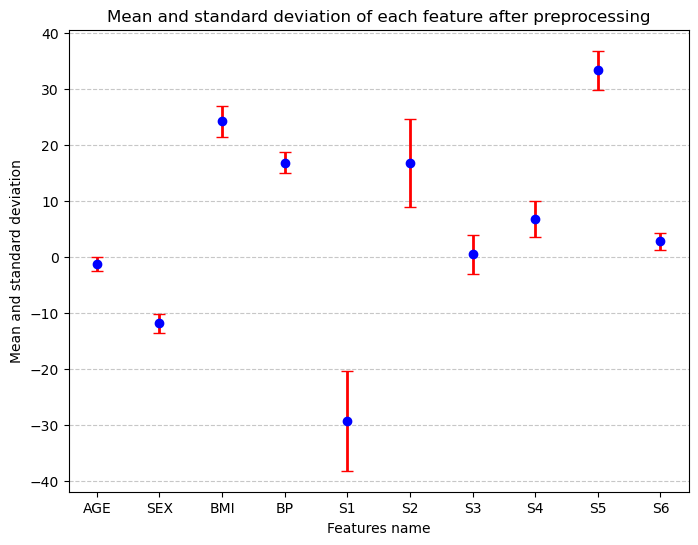

In [76]:
plt.figure(figsize=(8,6))
plt.errorbar(ws_mean.index,ws_mean,yerr=ws_std,fmt='o',ecolor='r',color='b',elinewidth=2,capsize=4)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.xlabel('Features name')
plt.ylabel('Mean and standard deviation')
plt.title('Mean and standard deviation of each feature after preprocessing')
plt.show()

In [77]:
import heapq
ws_mean_abs = np.abs(ws_mean)
max_three_ws = heapq.nlargest(3, ws_mean_abs)
max_three_index = heapq.nlargest(3, range(len(ws_mean_abs)), ws_mean_abs.__getitem__)
print('The coefficients of the top 3 important feature are:',max_three_ws)
print('The index of the top 3 features are:',max_three_index)
print('The top 3 important features are:',ws_mean.index[max_three_index])

The coefficients of the top 3 important feature are: [33.35193472945138, 29.213868090404628, 24.220704356428786]
The index of the top 3 features are: [8, 4, 2]
The top 3 important features are: Index(['S5', 'S1', 'BMI'], dtype='object')


**your answers here**

-Q1: Do you see a statistically significant change in the test score?

Before preprocessing, the mean of test score is 53.8924862901712, and the standard deviation of test score is 2.4429514050299703.
After preprocessing, the mean of test score is 53.869845807423665, and the standard deviation of test score is 2.44193559219411.
From the result above, we could find that there does not exist a significant change in the test score.


-Q2: How would you order the features based on the coefficients for feature importance? Explain your answer in a few sentences.

In order to select the features based on the coefficients for feature importance, we need to calculate the absolute mean value of each coefficient and select the top 3 largest coefficients and their corresponding features. This is because after we have preprocessed the future, all features have the same order of magnitudes. So in that way, if larger the coefficient is, more weight this feature has for the model, and more information from this feature will be introduced into the model, which means this feature is more important.


-Q3: Print out names of the top 3 most important features!

From the result above, we could figure out that the top 3 important features are 'S5', 'S1', and 'BMI'.


### Problem 2

In class we have seen both l1 (Lasso) and l2 (Ridge) regression. These are two basic ways to perform regularization. In the following problem, we will explore the **elastic net**, a third regularization technique that combines both l1 and l2 penalties. We will use this in a classification context. 

The basic idea of the elastic net is that the cost function in regression becomes

$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{ \alpha \rho \sum_{j=0}^{m}|\theta_j|} + \color{blue}{ \alpha (1-\rho) \sqrt{\sum_{j=0}^{m} \theta_j^2}}$,

and the cost function in classification is

$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}))] + \color{red}{ \alpha \rho \sum_{j=0}^{m}|\theta_j|} + \color{blue}{ \alpha (1-\rho) \sqrt{\sum_{j=0}^{m} \theta_j^2}}$,


where $\alpha$ is the regularization parameter and $\rho$ is the l1 ratio (how much weight we assign to the l1 term over the l2 term in the cost function). Basically, an elastic net uses the weighted sum of the l1 and l2 regularization terms. The weight of the l1 term is $\rho$ and the weight of the l2 term is $(1-\rho)$ where $\rho$ is between 0 and 1.

You can read more about the elastic net [here](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net).

Note that there are a large number of regularization techniques available in sklearn, the complete list of linear models are described [here](https://scikit-learn.org/stable/modules/linear_model.html).


### Problem 2a (3 points)

Load the training and validation sets from train.csv and val.csv from the `data` folder. 

Run a logistic regression model without regularization on the data and print the accuracy score of the validation set. Use the 'saga' solver. 

In [36]:
# your code here 
df_train = pd.read_csv('/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps6-XXXXiner/data/train.csv')
df_val = pd.read_csv('/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps6-XXXXiner/data/val.csv')
print(df_train.head())
print(df_val.head())

         f1        f2        f3        f4        f5        f6        f7  \
0  1.461042 -0.981857 -1.422945 -0.730731 -0.339806  0.881506  0.611719   
1  1.771168 -0.611661 -0.518310 -0.574928 -0.021916  0.434738  1.306540   
2  1.721854 -0.848146 -0.732264  1.908753 -0.196109  0.391204  0.804212   
3  0.406389 -0.692162 -0.299556 -0.996367 -0.389646  2.029564  0.026504   
4  0.324127  0.566817  1.219020 -0.390593  0.454838  0.991440 -0.463575   

         f8        f9       f10  y  
0  0.150598  0.067089 -1.895612  0  
1 -0.112140 -2.219259 -0.862489  0  
2  1.541096 -0.649041 -0.918713  0  
3  1.241019  0.787243  0.205722  0  
4  0.893511 -1.252105  1.340374  0  
         f1        f2        f3        f4        f5        f6        f7  \
0 -0.979971  1.052379  1.602230  0.403252  0.495639 -1.732062 -0.131164   
1 -2.381508  1.454535  0.313507  0.996001  0.477740 -0.442224 -0.951656   
2  0.934937 -0.331979 -0.211848 -1.842616 -0.018759  0.744778 -0.423341   
3  2.167751 -0.047196  0.63

In [37]:
X_train = df_train.loc[:,df_train.columns!='y']
y_train = df_train['y']
X_val = df_val.loc[:,df_val.columns!='y']
y_val = df_val['y']
print(X_train.head())
print(y_train.head())
print(X_val.head())
print(y_val.head())

         f1        f2        f3        f4        f5        f6        f7  \
0  1.461042 -0.981857 -1.422945 -0.730731 -0.339806  0.881506  0.611719   
1  1.771168 -0.611661 -0.518310 -0.574928 -0.021916  0.434738  1.306540   
2  1.721854 -0.848146 -0.732264  1.908753 -0.196109  0.391204  0.804212   
3  0.406389 -0.692162 -0.299556 -0.996367 -0.389646  2.029564  0.026504   
4  0.324127  0.566817  1.219020 -0.390593  0.454838  0.991440 -0.463575   

         f8        f9       f10  
0  0.150598  0.067089 -1.895612  
1 -0.112140 -2.219259 -0.862489  
2  1.541096 -0.649041 -0.918713  
3  1.241019  0.787243  0.205722  
4  0.893511 -1.252105  1.340374  
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64
         f1        f2        f3        f4        f5        f6        f7  \
0 -0.979971  1.052379  1.602230  0.403252  0.495639 -1.732062 -0.131164   
1 -2.381508  1.454535  0.313507  0.996001  0.477740 -0.442224 -0.951656   
2  0.934937 -0.331979 -0.211848 -1.842616 -0.018759  0.744778 -

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LogReg = LogisticRegression(solver='saga')
LogReg.fit(X_train,y_train)
y_val_pred = LogReg.predict(X_val)
print('Accuracy score is:',accuracy_score(y_val,y_val_pred))

Accuracy score is: 0.708


### Problem 2b (7 points)

Perform l1 regularization on the data. 

The value of the alpha should contain 21 uniformly spaced values in log from 1e-2 to 1e2. 

Again, use the 'saga' solver and if you see a converge warning, fix it without ignoring the warning. 

Plot the train and validation accuracy scores. 

Print the best validation accuracy score and the corresponding alpha values.


In [43]:
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

max_iter = 10000

alpha = np.logspace(-2,2,21)
accuracy_score_train_l1 = np.zeros(len(alpha))
accuracy_score_val_l1 = np.zeros(len(alpha))

for i in range(len(alpha)):
    log_reg_l1 = LogisticRegression(penalty='l1', C = 1/alpha[i], solver='saga', max_iter=max_iter)
    log_reg_l1.fit(X_train,y_train)
    y_train_pred = log_reg_l1.predict(X_train)
    y_val_pred = log_reg_l1.predict(X_val)
    accuracy_score_train_l1[i] = accuracy_score(y_train,y_train_pred)
    accuracy_score_val_l1[i] = accuracy_score(y_val,y_val_pred)

print(accuracy_score_train_l1)
print(accuracy_score_val_l1)

[0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73733333
 0.73733333 0.73866667 0.73866667 0.73866667 0.73866667 0.73733333
 0.73466667 0.74       0.73866667 0.73333333 0.73066667 0.72533333
 0.70133333 0.68       0.67333333]
[0.708 0.708 0.708 0.708 0.708 0.708 0.708 0.708 0.708 0.708 0.708 0.708
 0.716 0.724 0.724 0.72  0.724 0.724 0.716 0.692 0.688]


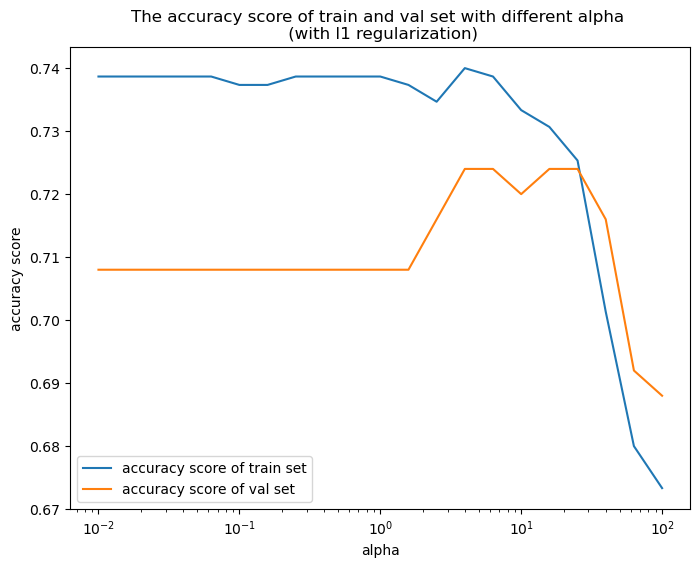

In [44]:
plt.figure(figsize=(8,6))
plt.plot(alpha,accuracy_score_train_l1)
plt.plot(alpha,accuracy_score_val_l1)
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('accuracy score')
plt.legend(['accuracy score of train set','accuracy score of val set'])
plt.title('The accuracy score of train and val set with different alpha \n (with l1 regularization)')
plt.show()

In [45]:
print('The best validation accuracy score is:',np.max(accuracy_score_val_l1))
print('Its corresponding alpha value is:',alpha[np.argmax(accuracy_score_val_l1)])

The best validation accuracy score is: 0.724
Its corresponding alpha value is: 3.981071705534973


### Problem 2c (1 point)

Perform l2 regularization on the data. The alpha values and all the other instructions are the same as in 2b.

In [46]:
# your code here 
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

max_iter = 10000

alpha = np.logspace(-2,2,21)
accuracy_score_train_l2 = np.zeros(len(alpha))
accuracy_score_val_l2 = np.zeros(len(alpha))

for i in range(len(alpha)):
    log_reg_l2 = LogisticRegression(penalty='l2', C = 1/alpha[i], solver='saga', max_iter=max_iter)
    log_reg_l2.fit(X_train,y_train)
    y_train_pred = log_reg_l2.predict(X_train)
    y_val_pred = log_reg_l2.predict(X_val)
    accuracy_score_train_l2[i] = accuracy_score(y_train,y_train_pred)
    accuracy_score_val_l2[i] = accuracy_score(y_val,y_val_pred)

print(accuracy_score_train_l2)
print(accuracy_score_val_l2)

[0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
 0.73866667 0.73866667 0.73866667 0.73866667 0.73733333 0.73866667
 0.73733333 0.73866667 0.73866667 0.74       0.736      0.73866667
 0.73466667 0.73333333 0.73066667]
[0.708 0.708 0.708 0.708 0.708 0.708 0.708 0.708 0.708 0.708 0.708 0.708
 0.708 0.708 0.708 0.712 0.716 0.72  0.716 0.72  0.712]


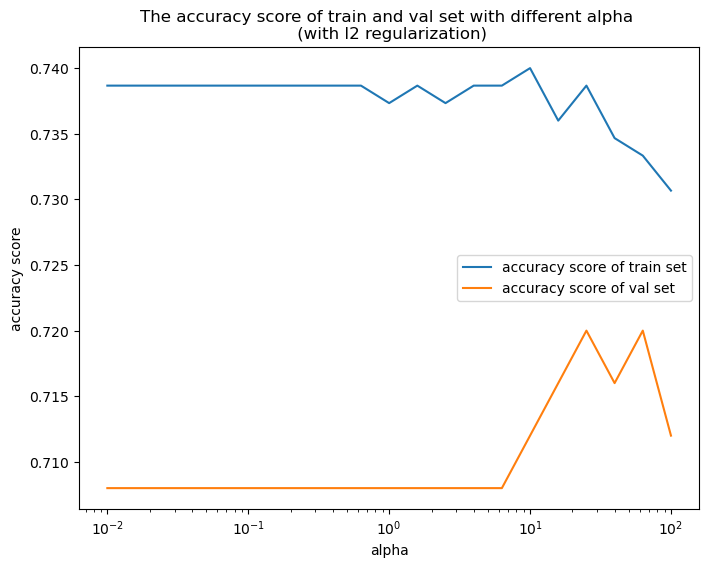

In [82]:
plt.figure(figsize=(8,6))
plt.plot(alpha,accuracy_score_train_l2)
plt.plot(alpha,accuracy_score_val_l2)
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('accuracy score')
plt.legend(['accuracy score of train set','accuracy score of val set'])
plt.title('The accuracy score of train and val set with different alpha \n (with l2 regularization)')
plt.show()

In [49]:
print('The best validation accuracy score is:',np.max(accuracy_score_val_l2))
print('Its corresponding alpha value is:',alpha[np.argmax(accuracy_score_val_l2)])

The best validation accuracy score is: 0.72
Its corresponding alpha value is: 25.11886431509582


### Problem 2d (10 points)

Let's train an elastic net now! The elastic net has two parameters: alpha and rho (the l1 ratio). The l1 ratio should be linearly spaced between 0 and 1 with 21 values in between, while alpha should be spaced as outlined above. (1 point) Use the 'saga' solver. The reason we use the saga solver everywhere in Problem 2 is that it is the only solver in LogisticRegression that works with an elastic net. 

Calculate the train and validation accuracy scores for all combinations of alpha and rho. 

Print the best validation score and the corresponding alpha and rho values. 

Prepare heatmaps to show the train and validation scores. Make sure that the data range covered by the two heatmaps are the same so you can easily compare the two heatmaps and you can identify the high bias and high variance regions. Label the plot and add a colorbar. Make the x and y ticks look pretty. 

Which of the four approaches gave you the best validation score?

In [51]:
# your code here

rho = np.linspace(0,1,21)
alpha = np.logspace(-2,2,21)

accuracy_score_train_elastic = np.matrix(np.zeros(len(alpha)*len(rho))).reshape(len(alpha),len(rho))
accuracy_score_val_elastic = np.matrix(np.zeros(len(alpha)*len(rho))).reshape(len(alpha),len(rho))

for i in range(len(alpha)):
    for j in range(len(rho)):        
        log_reg_elastic = LogisticRegression(penalty='elasticnet', C = 1/alpha[i], l1_ratio = rho[j], solver='saga', max_iter=max_iter)
        log_reg_elastic.fit(X_train,y_train)
        y_train_pred = log_reg_elastic.predict(X_train)
        y_val_pred = log_reg_elastic.predict(X_val)
        accuracy_score_train_elastic[i,j] = accuracy_score(y_train,y_train_pred)
        accuracy_score_val_elastic[i,j] = accuracy_score(y_val,y_val_pred)

print(accuracy_score_train_elastic)
print(accuracy_score_val_elastic)


[[0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667]
 [0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667]
 [0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667]
 [0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667 0.73866667 0.73866667 0.73866667
  0.73866667 0.73866667 0.73866667]
 [0.73866667 0.73866667 0.73866667 0.738

In [52]:
print('The best validation accuracy score is:',np.max(accuracy_score_val_elastic))
max_coords = np.unravel_index(accuracy_score_val_elastic.argmax(),np.shape(accuracy_score_val_elastic))
print('Its corresponding alpha value is:',alpha[max_coords[0]])
print('Its corresponding rho value is:',rho[max_coords[1]])

The best validation accuracy score is: 0.732
Its corresponding alpha value is: 39.810717055349734
Its corresponding rho value is: 0.35000000000000003


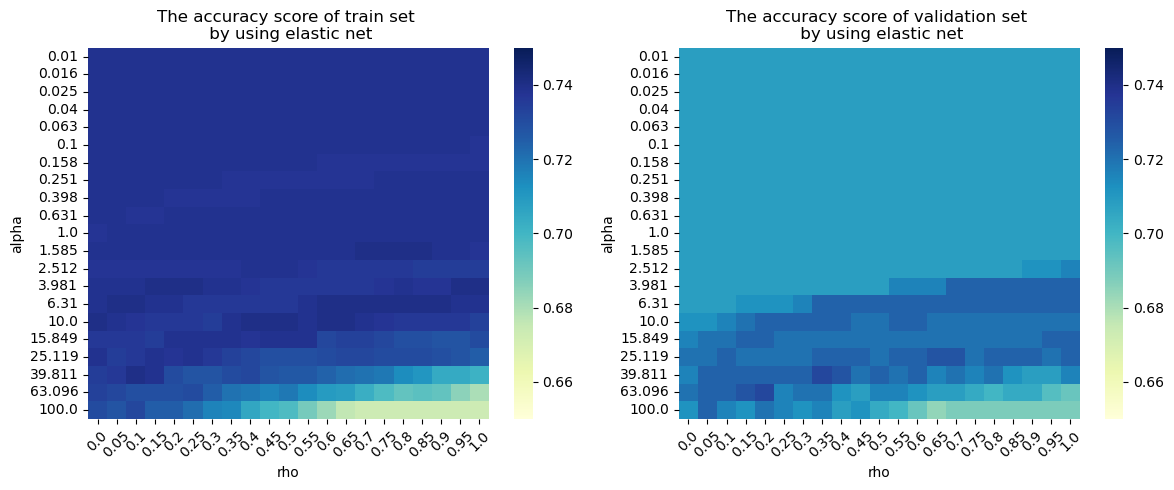

In [78]:
import seaborn as sns

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(accuracy_score_train_elastic,cmap='YlGnBu',xticklabels=np.round(rho, 3),yticklabels=np.round(alpha, 3),vmin = 0.65,vmax=0.75)
plt.xlabel('rho')
plt.ylabel('alpha')
plt.xticks(rotation=45)
plt.title('The accuracy score of train set \n by using elastic net')

plt.subplot(1,2,2)
sns.heatmap(accuracy_score_val_elastic,cmap='YlGnBu',xticklabels=np.round(rho, 3),yticklabels=np.round(alpha, 3),vmin = 0.65,vmax=0.75)
plt.xlabel('rho')
plt.ylabel('alpha')
plt.xticks(rotation=45)
plt.title('The accuracy score of validation set \n by using elastic net')
plt.tight_layout()
plt.show()

From the results above, we could find that:

The accuracy score of validation set without regularization is: 0.708.

The accuracy score of validation set by using l1 regularization is: 0.724. 

The accuracy score of validation set by using l2 regularization is: 0.72.

The accuracy score of validation set by using elastic net regularization is: 0.732.

Therefore, the approach of using elastic net regularization gives us the best accuracy score.